In [ ]:
!pip install datasets[vision]

In [ ]:
!pip install pillow

Importing all the important libraries

In [ ]:
import cv2 as cv
import os
import numpy as np
# from datasets import load_dataset,Image
import pandas as pd
from google.colab.patches import cv2_imshow as cv_imshow
from google.colab import userdata
from PIL import Image
import io
userdata.get('key')
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

loading dataset

In [ ]:
df = pd.read_parquet("hf://datasets/Marxulia/asl_sign_languages_alphabets_v03/data/train-00000-of-00001.parquet")

Feature extraction

In [ ]:
def Feature_Extraction(img):
  orb = cv.ORB_create()
  kp = orb.detect(img,None)
  kp, des = orb.compute(img, kp)
  print(kp)
  print(des)
  return kp,des

Converting Byte to image array

In [ ]:
def Convert_Byte_to_Img(df):
  for i in range(len(df)):
    byte_img = df["image"][i]
    img = Image.open(io.BytesIO(byte_img["bytes"]))
    img = img.convert("RGB")
    df["image"][i] = np.array(img)
  return df

converting bgr to rgb

In [ ]:
def Convert_to_RGB(df):
  for i in range(len(df["image"])):
    img = df["image"][i]
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    df["image"][i] = np.array(img)
  return df

Resizing  Images

In [ ]:
def Image_Resize(df):
  width,height = (64,64)
  for i in range(len(df)):
    df["image"][i] = cv.resize(df["image"][i],(width,height))
  return df

Converting RGB to GRAY

In [ ]:
def Convert_to_Gray(img):
  gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
  return gray

Noise reduction

In [ ]:
def Noise_reduction(img):
  blur = cv.GaussianBlur(img,(3,3),0,borderType=cv.BORDER_DEFAULT)
  return blur

Edge detection

In [ ]:
def Edge_Detection(img):
  canny_img = cv.Canny(img,125,175)
  return canny_img

In [ ]:
def Thresholding(img):
  threst_img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3)
  return threst_img

In [ ]:
# Intially Converting Byte data into numpy array
df = Convert_Byte_to_Img(df)
# Convert the BGR images into RGB Images
df = Convert_to_RGB(df)
# Resizing the images
df = Image_Resize(df)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [189, 189, 189, ..., 189, 189, 189],
       [187, 187, 187, ..., 187, 187, 187],
       [186, 186, 186, ..., 186, 186, 186]], dtype=uint8)
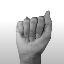

In [ ]:
# Convert normal image to grayscale
df["GrayScale"] = df["image"].apply(Convert_to_Gray)
df["GrayScale"][1]

In [ ]:
#applying Blur effect
df["Blurred_img"] = df["GrayScale"].apply(Noise_reduction)

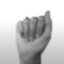

Image after applying Blur


In [ ]:
cv_imshow(df["Blurred_img"][1])
print("Image after applying Blur")

In [ ]:
# apply edge detection
df["Img_edges"] = df["GrayScale"].apply(Edge_Detection)

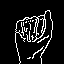

Edges of image


In [ ]:
cv_imshow(df["Img_edges"][1])
print("Edges of image")

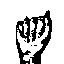

The results after Adaptive Thresholding


In [ ]:
df['Thresholded_Images'] = df['GrayScale'].apply(Thresholding)
cv_imshow(df['Thresholded_Images'][1])
print('The results after Adaptive Thresholding')

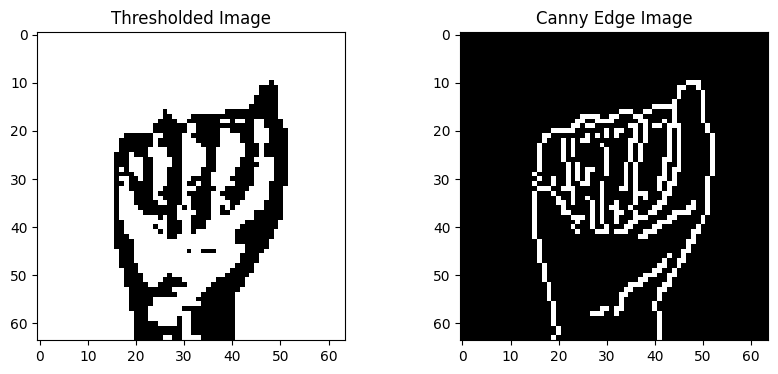

From the above images we can see the Thresholding is performing better in edge detection


In [ ]:
fig , axes = plt.subplots(1,2,figsize=(10,4))
axes[0].imshow(df['Thresholded_Images'][1],cmap='gray')
axes[0].set_title('Thresholded Image')
axes[1].imshow(df["Img_edges"][1],cmap='gray')
axes[1].set_title('Canny Edge Image')
plt.show()
print('From the above images we can see the Thresholding is performing better in edge detection')

In [ ]:
def Save_data(name,df):
  alpha = 65
  DIR = '/content/drive/MyDrive/Hear the Sign/Dataset'

  if name not in os.listdir(DIR):
    path = os.path.join(DIR,name)
    os.mkdir(path)

  DIR = path

  for index in range(len(df)):
    print(path)
    print(chr((df['label'][index])+alpha))
    if chr((df['label'][index])+alpha) not in os.listdir(DIR):
      path = os.path.join(DIR,chr((df['label'][index])+alpha))
      os.mkdir(path)
      cv.imwrite(f'{path}/Img_{index}.jpg',df['GrayScale'][index])
    else:
      path = f"/content/drive/MyDrive/Hear the Sign/Dataset/{name}/{chr((df['label'][index])+alpha)}"
      cv.imwrite(f'{path}/Img_{index}.jpg',df['GrayScale'][index])



In [ ]:
Save_data('GrayScale',df)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/content/drive/MyDrive/Hear the Sign/Dataset/GrayScale/U
U
/cont